# Matrices: Column View

We cn also think of matrices as a collection of vectors

\begin{equation}
\begin{bmatrix}
\begin{array}{rr{\qquad}1}
\pmb{c_1} &
\pmb{c_2} 
\end{array}
\end{bmatrix}
\pmb{x} =
\pmb{b}
\end{equation}

In this view, we can think of finding the vector $\pmb{x}$ consisting of the scalars$x_1$ and $x_2$ such that the weighted addition of the two vectors (columns of the matrix) on the LHS equals the vector on the RHS:

\begin{equation}
x_1\begin{bmatrix}
\begin{array}{r{\quad}1}
2\\ 4
\end{array}
\end{bmatrix} 
+ x_2
\begin{bmatrix}
\begin{array}{r{\quad}1}
4\\ 11
\end{array}
\end{bmatrix}=
\begin{bmatrix}
\begin{array}{r{\quad}1}
2 \\ 1
\end{array}
\end{bmatrix}
\end{equation}

In [2]:
%matplotlib inline

In [3]:
from utils import *

## Column View of Matrices

We can think of this problem from a different perspective: from the perspective of the columns of $\textbf{A}$. In this view, we can think of finding the scalars $x_1$ and $x_2$ such that the weighted addition of the two vectors (columns of the matrix) on the LHS equals the vector on the RHS:

\begin{equation}
x_1\begin{bmatrix}
\begin{array}{r{\quad}1}
2\\ 4
\end{array}
\end{bmatrix} 
+ x_2
\begin{bmatrix}
\begin{array}{r{\quad}1}
4\\ 11
\end{array}
\end{bmatrix}=
\begin{bmatrix}
\begin{array}{r{\quad}1}
2 \\ 1
\end{array}
\end{bmatrix}
\end{equation}

From the previous notebook, we know that the solution to the systems of equations is $(x_1=3,x_2=-1)$. We can add vectors graphically by putting the tail of the second vector on the tip of the first vector. The first vector

\begin{equation}
3\begin{bmatrix}
\begin{array}{r{\quad}1}
2\\ 4
\end{array}
\end{bmatrix} =
\begin{bmatrix}
\begin{array}{r{\quad}1}
6\\ 12
\end{array}
\end{bmatrix}
\end{equation}

is plotted in red and the second vector

\begin{equation}
-1\begin{bmatrix}
\begin{array}{r{\quad}1}
4\\ 11
\end{array}
\end{bmatrix} =
\begin{bmatrix}
\begin{array}{r{\quad}1}
-4\\ 11
\end{array}
\end{bmatrix}
\end{equation}
is plotted in green.

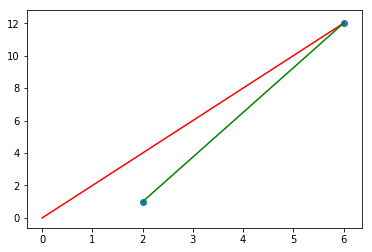

In [4]:
colors = ['r','g','y']
plot_vectors(((0,0),(6,12),'r'),((6,12),(-4,-11),'g'))

We see that the green vector ends at $(2,1)$ which is the vector on the RHS. This can be verified by explicitly plotting the RHS vector in blue.

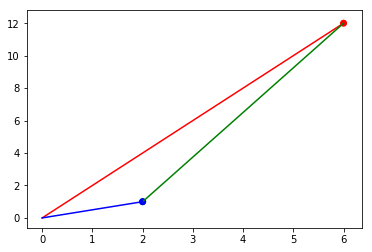

In [99]:
plot_vectors(((0,0),(6,12),'r'),((6,12),(-4,-11),'g'),((0,0),(2,1),'b'))

In [100]:
from sympy import Matrix, solve_linear_system
from sympy import symbols
x1,x2 = symbols("x1 x2")
system = Matrix(((2,4,2),(4,11,1)))
solve_linear_system(system,x1,x2)

{x1: 3, x2: -1}

In [101]:
import importlib
import utils
importlib.reload(utils)

<module 'utils' from '/Users/brian/Code/UUDeCART/UUDeCART2018/decart_advanced_python_2018/day1-vectors/utils.py'>

### Problem 

Representing a Matrix `M` as a list of columns, write a function that multiplies a vector `v` by a matrix `m`.

Note that the Python representing of `m` will look like rows even though they are columns.

```Python
m = ((2,4),(4,11))
```

In [8]:
from myvectors import *

In [9]:
def m_x_v(m,v):
    newv = [0]*len(v)
    for i in range(len(v)):
        newv = v_plus_v(newv, alpha_x_v(v[i], m[i]))
    return newv

In [10]:
m_x_v(((2,4),(4,11)), (3,-1))

(2, 1)

## Matrix-Matrix Multiplication

We can also think of matrix-matrix multiplication in a column view manner.

\begin{equation}
\pmb{A}_{m,n} \pmb{B}_{n,p}=\pmb{C}_{m,p}
\end{equation}

$\pmb{A}$ consists of $n$ columns with dimension $m$; \pmb{B} consists of $p$ columns with dimension $n$; the resulting matrix $\pmb{C}$ has $p$ columns of dimension $m$.

Column $i$ in $\pmb{C}$ is the result of multiplying the $i^{\text{th}}$ vector in $\pmb{B}$ by $\pmb{A}$.

\begin{equation}
    \pmb{A}
    \begin{bmatrix}
        \begin{array}{rrrr{\qquad}1}
            \pmb{b}_1 & \pmb{b}_2 & \cdots & \pmb{b}_p
        \end{array}
    \end{bmatrix}
=
    \begin{bmatrix}
        \begin{array}{rrrr{\qquad}1}
            (\pmb{Ab}_1) & (\pmb{Ab}_2) & \cdots & (\pmb{Ab}_p)
        \end{array}
    \end{bmatrix}
\end{equation}
 


In [11]:
from IPython.display import YouTubeVideo

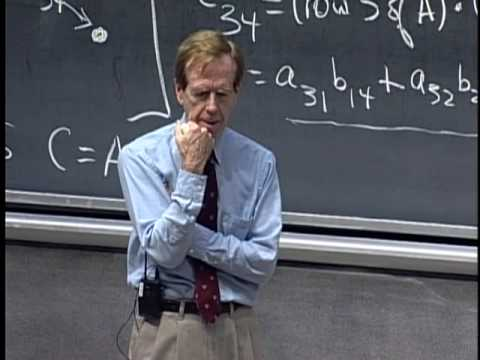

In [14]:
YouTubeVideo("FX4C-JpTFgY", start=380, end=608)

## Problem:
#### Looking at a Matrix as a collection of vectors, write a function that computes matrix multiplication column-wise

In [15]:
def m_x_m_c(A, B):
    C = [m_x_v(A,b) for b in B]
    return C

In [22]:
A = [[11,-15],[-15,29]]

In [23]:
m_x_m_c(A,A)

[(346, -600), (-600, 1066)]

## Does our Algorithm for a Transpose Need to be Any different for list of columns than list of rows?

In [24]:
def transpose(a):
    new_a = []
    for n in range(len(a[0])):
        new_r = []
        for m in range(len(a)):
            new_r.append(a[m][n])
        new_a.append(new_r)
    return new_a

In [25]:
transpose(A)

[[11, -15], [-15, 29]]

In [26]:
transpose(((1,3,-2),(1,-4,-3)))

[[1, 1], [3, -4], [-2, -3]]